In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [16]:

# Read the data
df = pd.read_csv('Data/colon-dataset-processed.csv')

df

,Class,Age,p16540_C/C,p16540_G/C,p16540_G/G,p16580_C/C,p16580_C/T,p16580_T/T,mdm2_G/G,mdm2_G/T,mdm2_T/T,GAL3_A/A,GAL3_C/A,GAL3_C/C,TIM1_C/C,TIM1_G/C,TIM1_G/G
0,healthy,49,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False
1,healthy,49,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
2,healthy,49,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False
3,healthy,36,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False
4,healthy,49,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,diagnosed,81,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True
111,diagnosed,73,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True
112,diagnosed,56,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False
113,diagnosed,74,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True


In [17]:
y=df['Class']

X=df.drop(['Class'], axis=1)

<span style="font-size:35px;">Normal Data</span>


In [18]:
#random forest classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


clf_OG = RandomForestClassifier(n_estimators=100, max_depth=10)

In [19]:
history = clf_OG.fit(X_train, y_train)

In [20]:
#evaluate model
from sklearn.metrics import classification_report

y_pred = clf_OG.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   diagnosed       0.77      0.77      0.77        13
     healthy       0.70      0.70      0.70        10

    accuracy                           0.74        23
   macro avg       0.73      0.73      0.73        23
weighted avg       0.74      0.74      0.74        23



In [21]:
#acurracy for model before hyperparameter tuning
clf_OG_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (clf_OG_accuracy * 100.0))

Accuracy: 73.91%


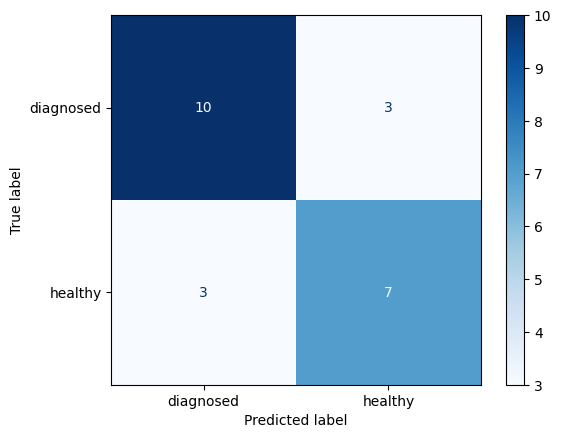

In [22]:
# Plot the confusion matrix
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_OG.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [23]:
importances = clf_OG.feature_importances_

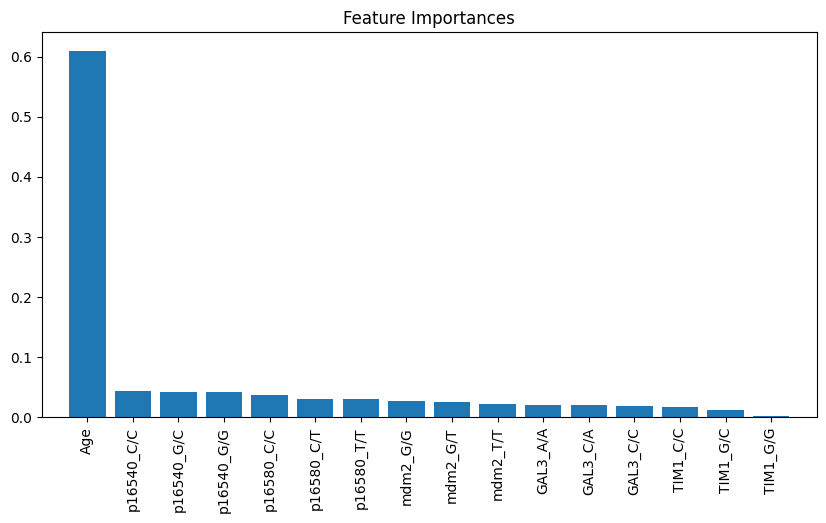

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names except the target variable
lables = df.columns[1:]

# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), labels=lables, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [25]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV, KFold



param_grid = {
    "n_estimators": [10, 20, 50, 100,200], 
    "max_depth": [3, 5, 10, 20, 50, 100],
    "max_features": [3, 5, 10, 20, 50, 100],
    "min_samples_split": [2, 5, 10, 20, 50, 100],
}

# Create the model
rf = RandomForestClassifier()

cv=KFold(n_splits=5, random_state=0, shuffle=True)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=cv, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=20; tota

KeyboardInterrupt: 

In [ ]:
#bulid model with best parameters
best_clf_OG=grid_search.best_estimator_

In [ ]:
#evaluate model
best_y_pred = best_clf_OG.predict(X_test)
print(classification_report(y_test, best_y_pred))

              precision    recall  f1-score   support

   diagnosed       0.86      0.92      0.89        13
     healthy       0.89      0.80      0.84        10

    accuracy                           0.87        23
   macro avg       0.87      0.86      0.87        23
weighted avg       0.87      0.87      0.87        23



In [ ]:
#accuracy
clf_OG2_accuracy = accuracy_score(y_test, best_y_pred)
print("Accuracy: %.2f%%" % (clf_OG2_accuracy * 100.0))

Accuracy: 86.96%


<span style="font-size:35px;">Oversampling</span>


In [26]:
print('Original dataset distribution %s' % Counter(y))

Original dataset distribution Counter({'diagnosed': 65, 'healthy': 50})


In [27]:
# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Check distribution after SMOTE
print('Resampled dataset distribution %s' % Counter(y_res))

Resampled dataset distribution Counter({'healthy': 65, 'diagnosed': 65})


In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res, y_res, test_size=0.2, random_state=123)


clf_over = RandomForestClassifier(n_estimators=100, max_depth=10)

In [29]:
history = clf_over.fit(X_train2, y_train2)

In [30]:
#evaluate model
from sklearn.metrics import classification_report

y_pred2 = clf_over.predict(X_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

   diagnosed       0.73      0.73      0.73        11
     healthy       0.80      0.80      0.80        15

    accuracy                           0.77        26
   macro avg       0.76      0.76      0.76        26
weighted avg       0.77      0.77      0.77        26



In [31]:
#acurracy for model before hyperparameter tuning
clf_over_accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy: %.2f%%" % (clf_over_accuracy * 100.0))

Accuracy: 76.92%


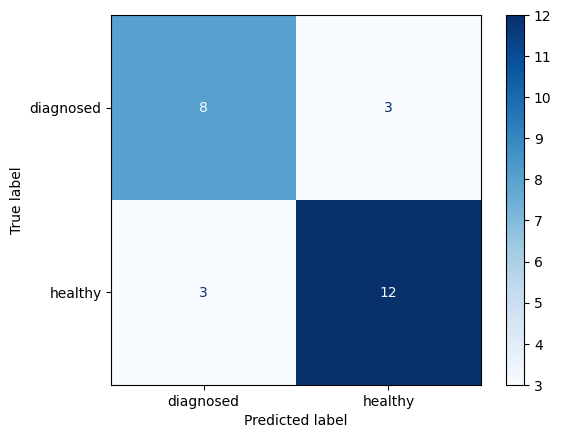

In [37]:
# Plot the confusion matrix
cm=confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_over.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [33]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV, KFold


# Create the model
rf = RandomForestClassifier()

cv=KFold(n_splits=4, random_state=0, shuffle=True)

# Instantiate the grid search model
grid_search2 = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=cv, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search2.fit(X_train2, y_train2)

# Print the best parameters
print("Best parameters found: ", grid_search2.best_params_)

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=20; tota

In [34]:
best_clf_over=grid_search2.best_estimator_

In [35]:
#evaluate model
best_y_pred2 = best_clf_over.predict(X_test2)
print(classification_report(y_test2, best_y_pred2))

              precision    recall  f1-score   support

   diagnosed       0.82      0.82      0.82        11
     healthy       0.87      0.87      0.87        15

    accuracy                           0.85        26
   macro avg       0.84      0.84      0.84        26
weighted avg       0.85      0.85      0.85        26



In [36]:
#accuracy
best_clf_over_accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy: %.2f%%" % (best_clf_over_accuracy * 100.0))

Accuracy: 76.92%


<span style="font-size:35px;">Undersampling</span>


In [38]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

# Check distribution after SMOTE
print('Resampled dataset distribution %s' % Counter(y_rus))

Resampled dataset distribution Counter({'diagnosed': 50, 'healthy': 50})


In [39]:
#random forest classifier

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_rus, y_rus, test_size=0.2, random_state=123)


clf_under = RandomForestClassifier(n_estimators=100, max_depth=10)

In [41]:
history3 = clf_under.fit(X_train3, y_train3)

In [42]:
#evaluate model
from sklearn.metrics import classification_report

y_pred3 = clf_under.predict(X_test3)
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

   diagnosed       0.89      0.89      0.89         9
     healthy       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [43]:
#acurracy for model before hyperparameter tuning
clf_under_accuracy = accuracy_score(y_test3, y_pred3)
print("Accuracy: %.2f%%" % (clf_under_accuracy * 100.0))

Accuracy: 90.00%


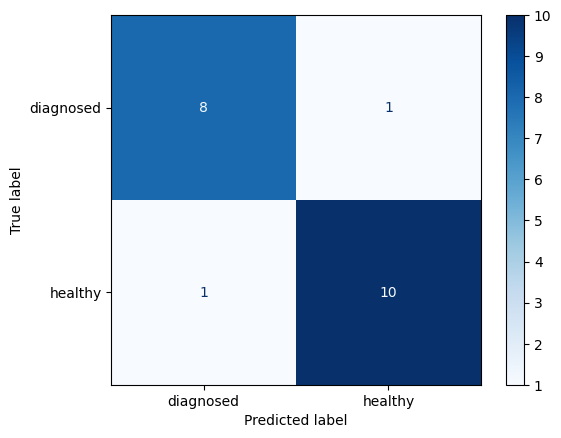

In [44]:
# Plot the confusion matrix
cm=confusion_matrix(y_test3, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_under.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [45]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV, KFold

# Create the model
rf = RandomForestClassifier()

cv=KFold(n_splits=4, random_state=0, shuffle=True)

# Instantiate the grid search model
grid_search3 = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=cv, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search3.fit(X_train3, y_train3)

# Print the best parameters
print("Best parameters found: ", grid_search3.best_params_)

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=3, min_samples_split=2, n_estimators=20; tota

In [46]:
best_clf_under=grid_search3.best_estimator_

In [47]:
best_y_pred3 = best_clf_under.predict(X_test3)
print(classification_report(y_test3, best_y_pred3))

              precision    recall  f1-score   support

   diagnosed       0.80      0.89      0.84         9
     healthy       0.90      0.82      0.86        11

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



In [48]:
best_clf_under_accuracy = accuracy_score(y_test3, best_y_pred3)
print("Accuracy: %.2f%%" % (best_clf_under_accuracy * 100.0))

Accuracy: 85.00%


<h3>Comapring Models Accuracy</h3>

In [49]:
#compare models before hyperparameter tuning
print("Accuracy for original dataset: %.2f%%" % (clf_OG_accuracy * 100.0))
print("Accuracy for oversampled dataset: %.2f%%" % (clf_over_accuracy * 100.0))
print("Accuracy for undersampled dataset: %.2f%%" % (clf_under_accuracy * 100.0))

Accuracy for original dataset: 73.91%
Accuracy for oversampled dataset: 76.92%
Accuracy for undersampled dataset: 90.00%


In [50]:
#compare models after hyperparameter tuning
print("Accuracy for original dataset: %.2f%%" % (clf_OG2_accuracy * 100.0))
print("Accuracy for oversampled dataset: %.2f%%" % (best_clf_over_accuracy * 100.0))
print("Accuracy for undersampled dataset: %.2f%%" % (best_clf_under_accuracy * 100.0))

Accuracy for original dataset: 86.96%
Accuracy for oversampled dataset: 76.92%
Accuracy for undersampled dataset: 85.00%
